In [22]:
from google.colab import drive
drive.mount('/content/drive')
!pip install eli5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np

In [24]:
path = '/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/mushrooms.csv'
df = pd.read_csv(path)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [25]:
# Kiem tra du lieu khuyet
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [26]:
import sklearn
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for columns in df.columns:
  df[columns] = labelEncoder.fit_transform(df[columns])
df=df.drop(['veil-type'],axis=1)

In [27]:
X = df.drop('class',axis=1)
y = df['class']
print(X)
print(y)

      cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0             5            2          4  ...                  2           3        5
1             5            2          9  ...                  3           2        1
2             0            2          8  ...                  3           2        3
3             5            3          8  ...                  2           3        5
4             5            2          3  ...                  3           0        1
...         ...          ...        ...  ...                ...         ...      ...
8119          3            2          4  ...                  0           1        2
8120          5            2          4  ...                  0           4        2
8121          2            2          4  ...                  0           1        2
8122          3            3          4  ...                  7           4        2
8123          5            2          4  ...                  4  

In [28]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [29]:
df_div = pd.melt(df,'class',var_name='Characteristics')
df_div

,class,Characteristics,value
0,1,cap-shape,5
1,0,cap-shape,5
2,0,cap-shape,0
3,1,cap-shape,5
4,0,cap-shape,5
...,...,...,...
170599,0,habitat,2
170600,0,habitat,2
170601,0,habitat,2
170602,1,habitat,2


[Text(0, 0, 'cap-shape'),
 Text(0, 0, 'cap-surface'),
 Text(0, 0, 'cap-color'),
 Text(0, 0, 'bruises'),
 Text(0, 0, 'odor'),
 Text(0, 0, 'gill-attachment'),
 Text(0, 0, 'gill-spacing'),
 Text(0, 0, 'gill-size'),
 Text(0, 0, 'gill-color'),
 Text(0, 0, 'stalk-shape'),
 Text(0, 0, 'stalk-root'),
 Text(0, 0, 'stalk-surface-above-ring'),
 Text(0, 0, 'stalk-surface-below-ring'),
 Text(0, 0, 'stalk-color-above-ring'),
 Text(0, 0, 'stalk-color-below-ring'),
 Text(0, 0, 'veil-color'),
 Text(0, 0, 'ring-number'),
 Text(0, 0, 'ring-type'),
 Text(0, 0, 'spore-print-color'),
 Text(0, 0, 'population'),
 Text(0, 0, 'habitat')]

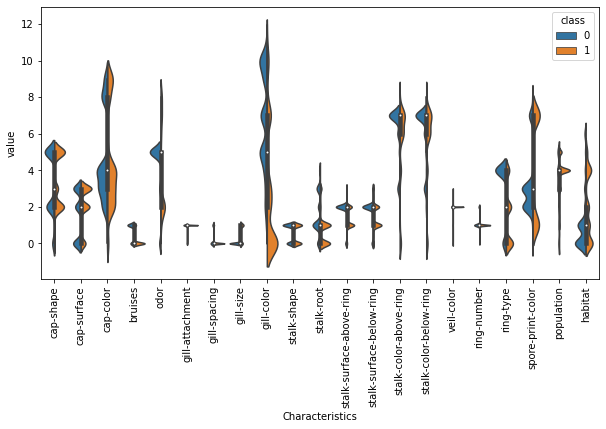

In [30]:
import matplotlib
#import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
#import matplotlib.axes.Axes.set_xticklabels
fig, ax = plt.subplots(figsize=(10,5))
chart = sns.violinplot(x = 'Characteristics',y = 'value',hue = 'class',data = df_div,split=True)
df_no_class = df.drop(["class"],axis = 1)
chart.set_xticklabels(rotation = 90, labels=list(df_no_class))

Text(0.5, 0, 'class')

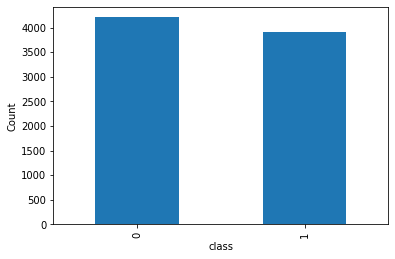

In [31]:
#import matplotlib.pyplot as plt
plt.figure()
#pd.Series(df['class']).value_counts()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

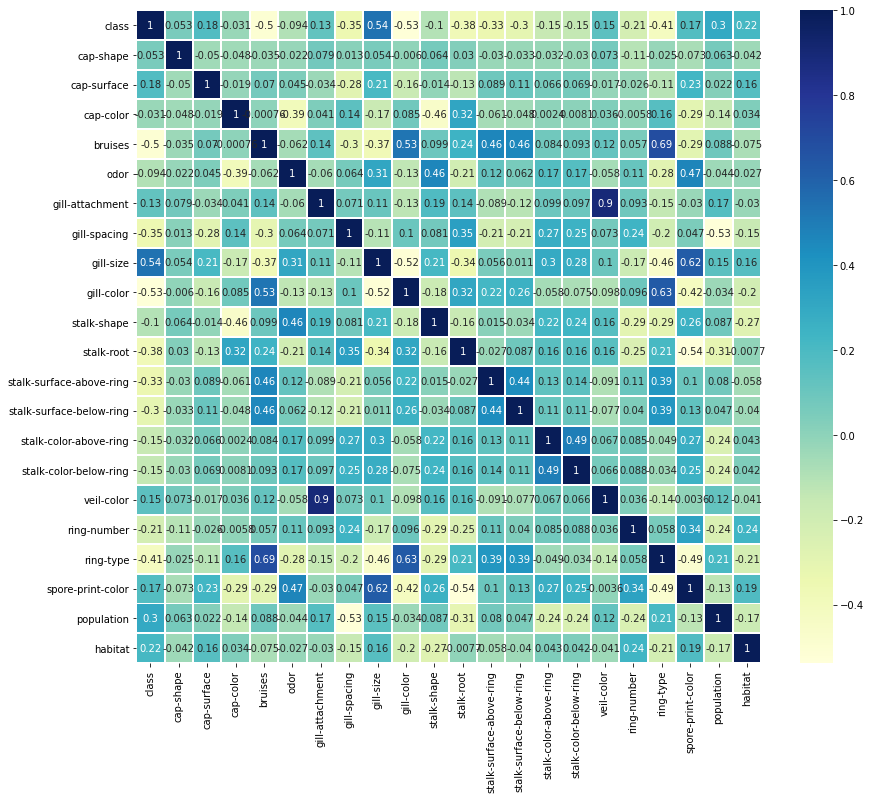

In [32]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=1,cmap="YlGnBu",annot=True)
plt.yticks(rotation = 0)

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

Decision Tree Classification

In [34]:
print("Decided Tree Classification")
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

scores = cross_val_score(clf,X,y,cv=5)
print('Scores: ',scores)
print('Final Score: ',scores.mean())

Decided Tree Classification
Accuracy:  1.0
Scores:  [0.88184615 1.         0.99753846 1.         0.65517241]
Final Score:  0.9069114058355436


In [35]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clf,random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.to_list())

Weight,Feature
0.2379 ± 0.0129,gill-color
0.1289 ± 0.0088,spore-print-color
0.0714 ± 0.0053,population
0.0702 ± 0.0089,gill-size
0.0574 ± 0.0069,stalk-root
0.0526 ± 0.0038,odor
0.0418 ± 0.0044,habitat
0.0383 ± 0.0040,ring-number
0.0368 ± 0.0053,stalk-shape
0.0267 ± 0.0035,stalk-surface-below-ring


In [36]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
feature_cols = df_no_class.columns.to_list()
print(feature_cols)
export_graphviz(clf,out_file = dot_data,filled = True,rounded = True,special_characters = True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/mushrooms.png')

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


True

Support Vector Classification

In [37]:
print("Support Vector Classification")
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

scores = cross_val_score(clf,X,y,cv=5)
print("Scores: ",scores)
print('Final Score: ',scores.mean())

Support Vector Classification
Accuracy:  0.9883076923076923
Scores:  [0.816      0.99569231 0.89907692 1.         0.49938424]
Final Score:  0.8420306934444864


Random Forest Classification

In [38]:
print('Random Forest Classification')
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

scores = cross_val_score(clf,X,y,cv=5)
print("Scores: ",scores)
print("Final Score: ",scores.mean())

Random Forest Classification
Accuracy:  1.0
Scores:  [0.84246154 1.         1.         1.         0.65517241]
Final Score:  0.8995267904509283


Logistic Regression

In [39]:
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = np.size(y_train))
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Acurracy: ",accuracy_score(y_test,y_pred))

scores = cross_val_score(clf,X,y,cv=5)
print("Scores: ",scores)
print("Final score: ",scores.mean())

Logistic Regression
Acurracy:  0.9452307692307692
Scores:  [0.64184615 0.98338462 0.87569231 0.99815385 0.65332512]
Final score:  0.8304804092459264
